# Exploratory Data Analysis (EDA):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


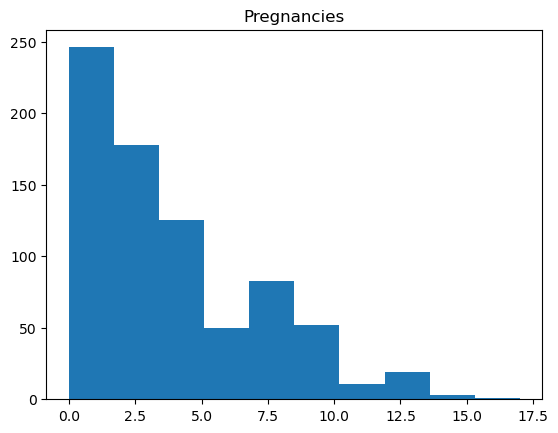

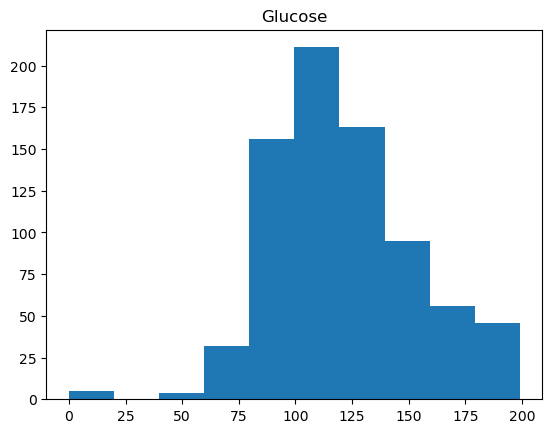

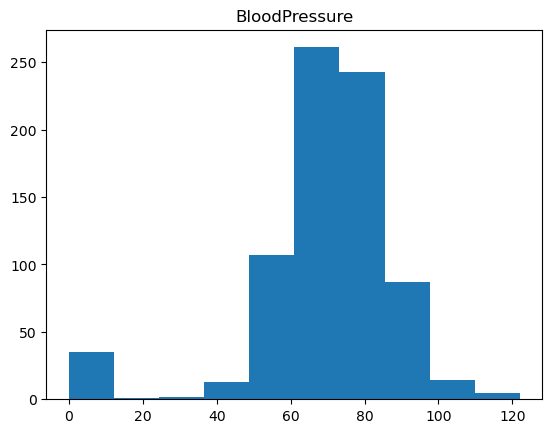

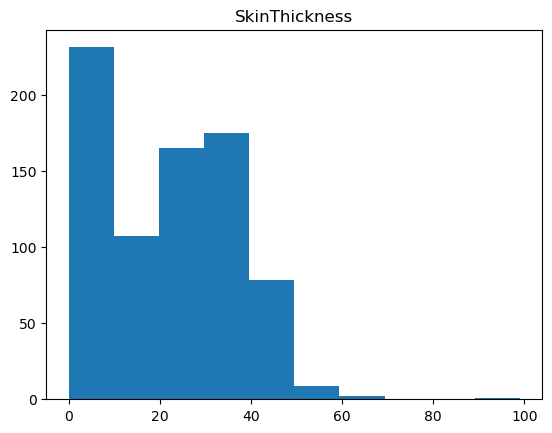

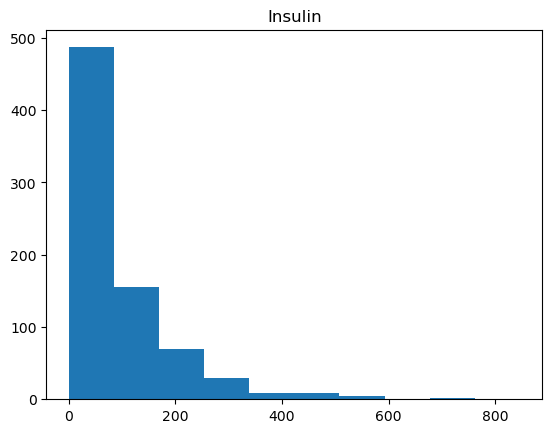

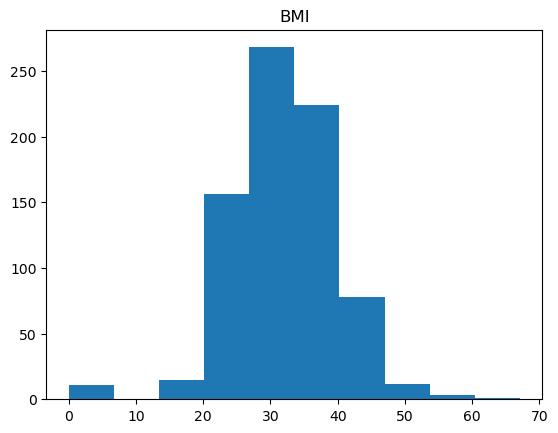

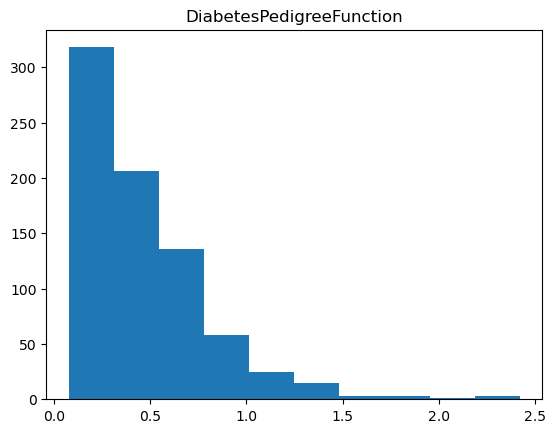

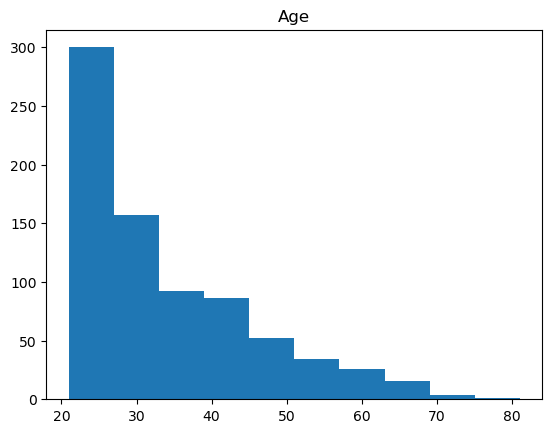

In [6]:
# Histogram

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Outcome'] 

for col in num_cols:
    plt.hist(df1[col])
    plt.title(col)
    plt.show()

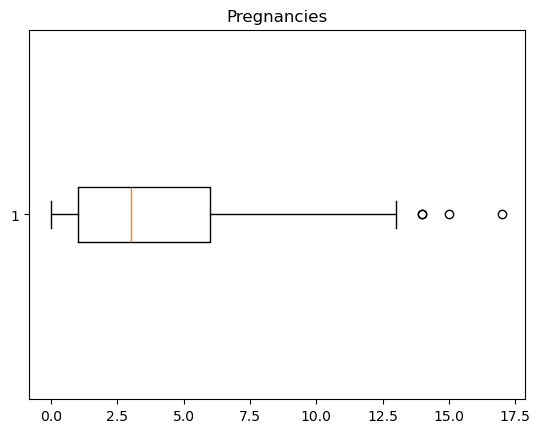

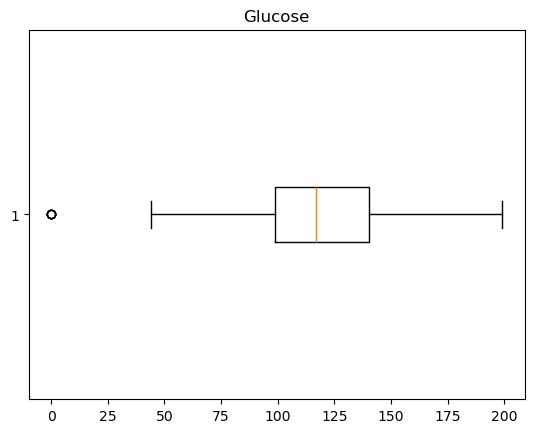

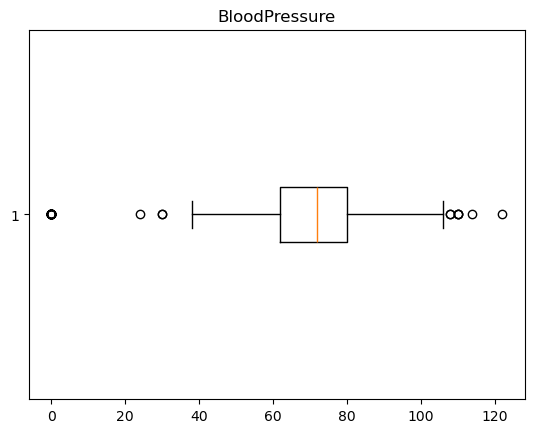

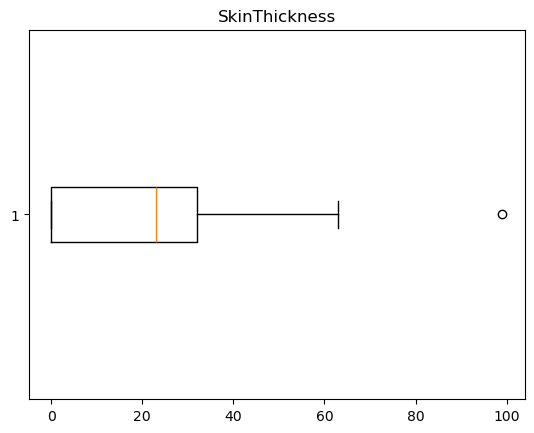

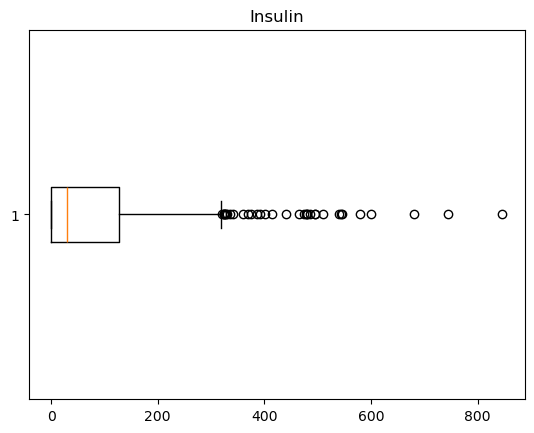

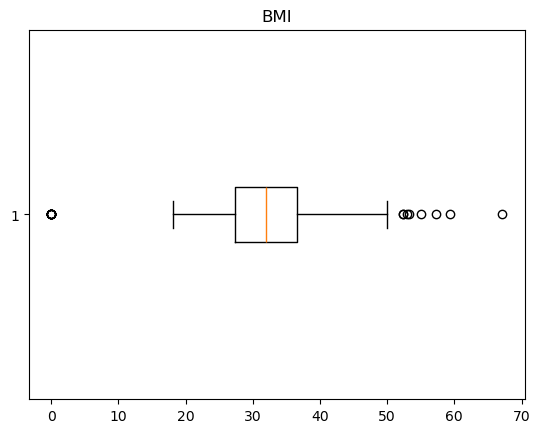

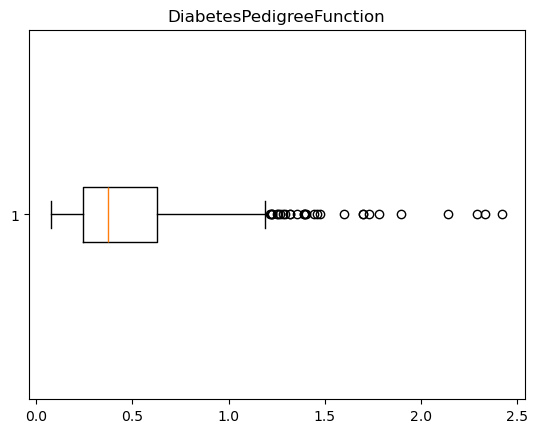

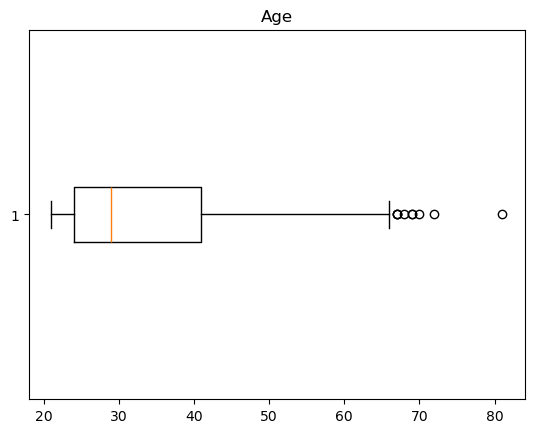

In [7]:
# Box Plot

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Outcome'] 

for col in num_cols:
    plt.boxplot(df1[col], vert = False)
    plt.title(col)
    plt.show()

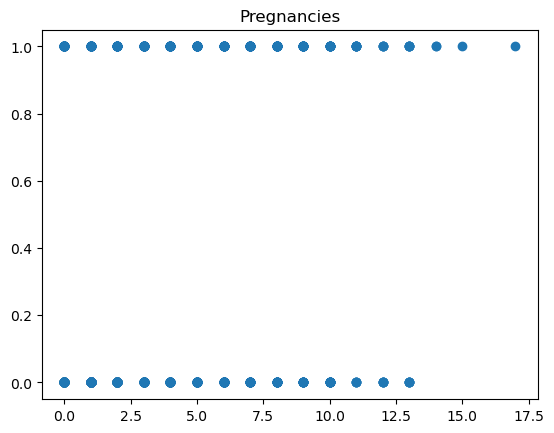

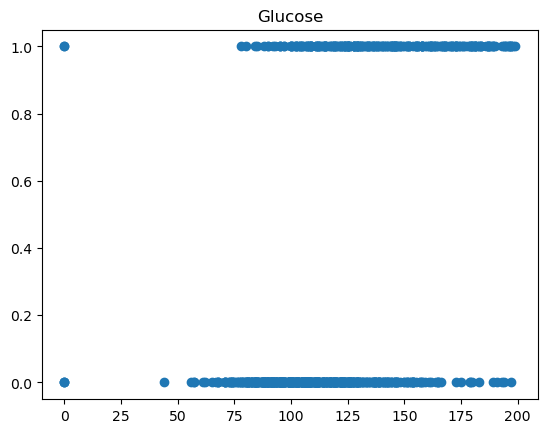

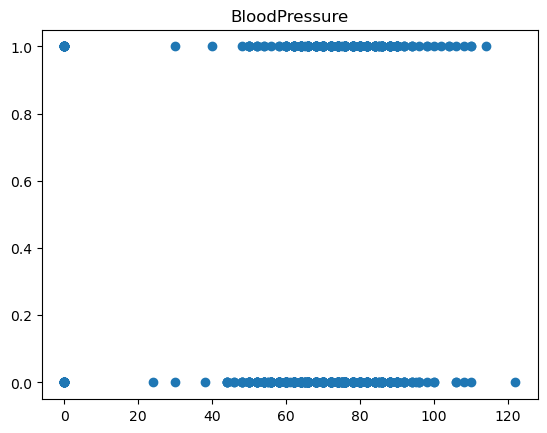

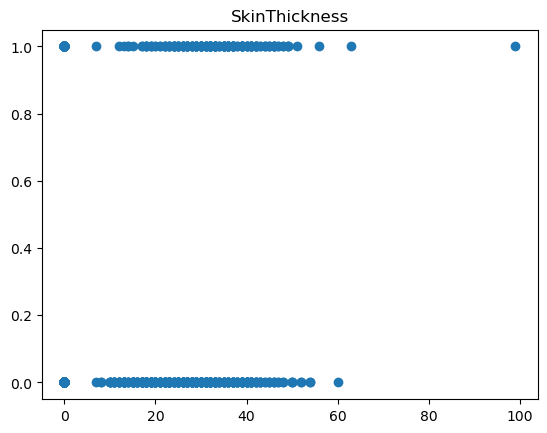

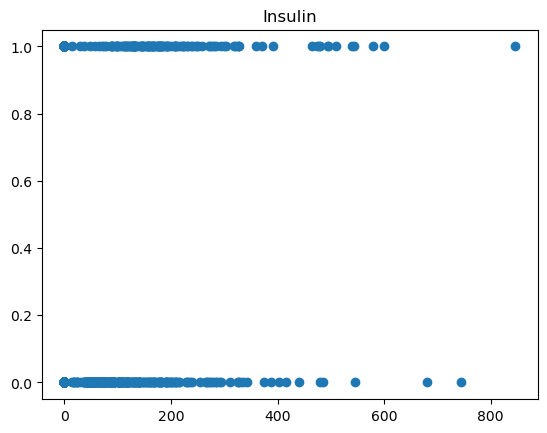

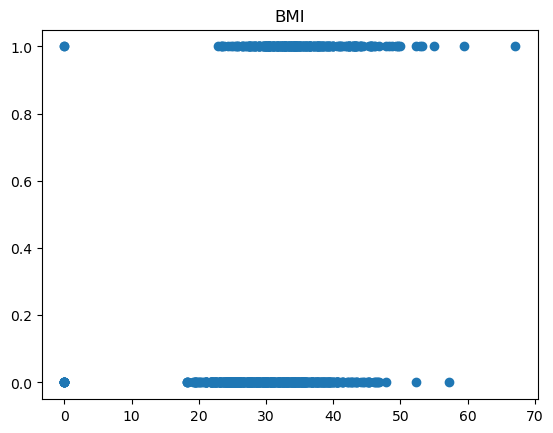

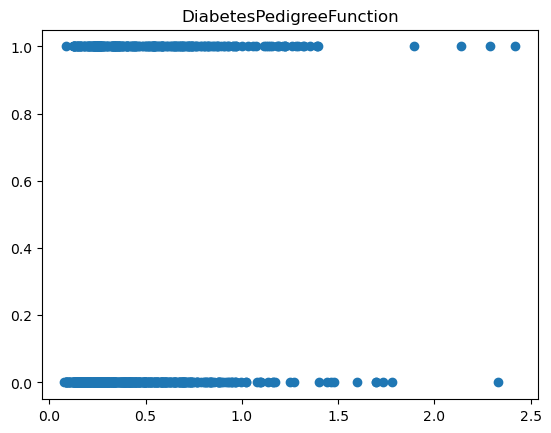

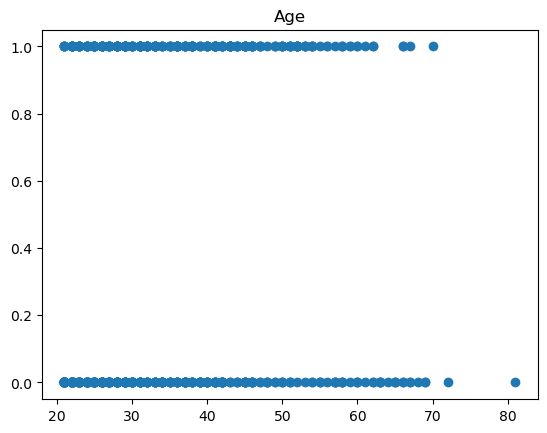

In [8]:
# Scatter Plot

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Outcome'] 

for col in num_cols:
    plt.scatter(df1[col], df1['Outcome'])
    plt.title(col)
    plt.show()

# Data Preprocessing:

In [9]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
df2 = ss.fit_transform(df1.iloc[:, 0:8])
df2 = pd.DataFrame(df2)
df2.columns = list(df1.iloc[:, 0:8])
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [14]:
df3 = pd.concat([df2, df1['Outcome']], axis = 1) 
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# Building Predictive Models:

In [ ]:
# !pip install lightgbm

In [ ]:
# !pip install xgboost

In [15]:
x = df3.iloc[:, 0:8]
y = df3['Outcome']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train_lg, x_test_lg, y_train_lg, y_test_lg = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
import lightgbm as lgb

In [24]:
lgb_model = lgb.LGBMClassifier(n_estimators = 300, learning_rate = 0.1, random_state = 100, verbose = -1)

In [25]:
lgb_model.fit(x_train_lg, y_train_lg)

LGBMClassifier(n_estimators=300, random_state=100, verbose=-1)

In [26]:
y_pred_test_lg = lgb_model.predict(x_test_lg)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [28]:
test_score = accuracy_score(y_test_lg, y_pred_test_lg)
f1_scr = f1_score(y_test_lg, y_pred_test_lg)
c_rpt = classification_report(y_test_lg, y_pred_test_lg)

print("lgb_model Test accuracy:", np.round(test_score, 2))
print("lgb_model Test f1 score:", np.round(f1_scr, 2))
print("lgb_model Test classification report:", c_rpt)

lgb_model Test accuracy: 0.72
lgb_model Test f1 score: 0.63
lgb_model Test classification report:               precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



In [43]:
# Define the parameter grid

param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.1, 0.5, 1, 5]
}

from sklearn.model_selection import GridSearchCV

# Create a LG Boost Classifier

lgb_model = lgb.LGBMClassifier()

# Create a GridSearchCV object

grid_search_lg = GridSearchCV(estimator = lgb_model, param_grid = param_grid, cv = 6, scoring = "accuracy")

# Fit the GridSearchCV object to the data 

grid_search_lg.fit(x_train_lg, y_train_lg)

# print the best hyperparameters and the best score

print("Best LGBM Params:", grid_search.best_params_)

Best LGBM Params: {'gamma': 10, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 4}


In [31]:
x_train_xg, x_test_xg, y_train_xg, y_test_xg = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
import xgboost as xgb

In [33]:
xgb_model = xgb.XGBClassifier(n_estimators = 300, learning_rate = 0.1, gamma = 10, reg_lambda = 4)

In [34]:
xgb_model.fit(x_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=10, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred_test_xg = xgb_model.predict(x_test_xg)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [37]:
test_score = accuracy_score(y_test_xg, y_pred_test_xg)
f1_scr = f1_score(y_test_xg, y_pred_test_xg)
c_rpt = classification_report(y_test_xg, y_pred_test_xg)

print("lgb_model Test accuracy:", np.round(test_score, 2))
print("lgb_model Test f1 score:", np.round(f1_scr, 2))
print("lgb_model Test classification report:", c_rpt)

lgb_model Test accuracy: 0.78
lgb_model Test f1 score: 0.65
lgb_model Test classification report:               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [42]:
# Define the parameter grid

param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.1, 0.5, 1, 5],
    'gamma' : [10, 20, 30, 40],
    'reg_lambda' : [4, 8, 12, 16]
}

from sklearn.model_selection import GridSearchCV

# Create a XG Boost Classifier

lgb_model = lgb.LGBMClassifier()

# Create a GridSearchCV object

grid_search_xg = GridSearchCV(estimator = lgb_model, param_grid = param_grid, cv = 6, scoring = "accuracy")

# Fit the GridSearchCV object to the data 

grid_search_xg.fit(x_train_lg, y_train_lg)

# print the best hyperparameters and the best score

print("Best LGBM Params:", grid_search.best_params_)

Best LGBM Params: {'gamma': 10, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 4}


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
lg_scores = cross_val_score(grid_search_lg.best_estimator_, x, y, cv=5, scoring='accuracy')
xg_scores = cross_val_score(grid_search_xg.best_estimator_, x, y, cv=5, scoring='accuracy')

print(f"LGBM CV Mean: {lgb_scores.mean():.4f} (+/- {lgb_scores.std():.4f})")
print(f"XGBM CV Mean: {xgb_scores.mean():.4f} (+/- {xgb_scores.std():.4f})")

LGBM CV Mean: 0.7358 (+/- 0.0326)
XGBM CV Mean: 0.7709 (+/- 0.0349)


In [46]:
results = pd.DataFrame({
    "Model": ['LGBM', 'XGBoost'],
    "Accuracy": [accuracy_score(y_test_lg, y_pred_test_lg), accuracy_score(y_test_xg, y_pred_test_xg)],
    "F1-score": [f1_score(y_test_lg, y_pred_test_lg), f1_score(y_test_xg, y_pred_test_xg)],
    "CV Accuracy": [lg_scores.mean(), xg_scores.mean()]
})
print(results)

     Model  Accuracy  F1-score
0     LGBM  0.720779  0.632479
1  XGBoost  0.779221  0.653061


# Comparative Analysis:

1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
--> XGBoost achieved a good balance between precision and recall, especially on class 0.
--> LightGBM showed slightly higher precision on class 1 but lower recall compared to XGBoost.
--> Overall, LightGBM performed marginally better in terms of accuracy, but XGBoost was more consistent across metrics.

2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
--> XGBoost tends to be more robust and slightly more accurate due to better regularization.
--> Both models captured important relationships, but XGBoost was simpler to tune.
--> The confusion matrix and classification reports helped reveal that both models had some difficulty predicting minority class correctly.

LightGBM vs XGBoost:

1. Performance:
--> LightGBM slightly outperformed XGBoost in accuracy and minority class precision.
--> XGBoost trained faster and gave balanced precision, recall, and F1-score.
Both models generalized well with low overfitting.

2. Practical Use:
--> XGBoost is better for maximum accuracy and stronger regularization.
--> LightGBM suits large-scale or time-sensitive tasks due to speed and efficiency.
--> Choice depends on data size, speed needs, and accuracy goals.